# Korrelation von fehlenden Werten mit einzelnen Variablen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def reset_base():
    pd.set_option('display.float_format', lambda x: '%.4f' % x)

    base= pd.read_csv('../Data/WDIData.csv') #see downloads worldbank
    base = base.drop(['Country Code', 'Indicator Code', 'Unnamed: 66'], axis=1) #name of column 'Unnamed: 66' may differ

    countries = pd.read_csv('additional_data/countries.csv').drop('Unnamed: 0', axis=1)
    base = pd.merge(base, countries, how='left')
    base = base.loc[base['Type'] != 'Region'].drop('Type', axis=1)

    base = base.set_index(['Country Name', 'Indicator Name'])
    base = base.loc[:, '1990':'2020']

    #idx = pd.IndexSlice
    #keep = pd.DataFrame(pd.DataFrame(base.isna().groupby('Indicator Name').sum()).T.sum(), columns=['NaN'])
    #keep = keep.loc[keep['NaN'] <len(base.index.get_level_values('Country Name').unique())*len(base.columns)*0.8] #kept if 80% of entries are not NaN
    #base = base.loc[idx[:, keep.index], :]
    return base

In [3]:
base= reset_base()

In [4]:
base.head(1)

,,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,Indicator Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Access to clean fuels and technologies for cooking (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.5000,23.0000,24.8000,26.7000,28.6000,30.3000,32.2000,34.1000,36.0000,NaN


In [5]:
base.isna().groupby('Country Name').sum().T.sum()

Country Name
Afghanistan              27434
Albania                  18556
Algeria                  20316
American Samoa           40907
Andorra                  39147
                         ...  
Virgin Islands (U.S.)    38106
West Bank and Gaza       24741
Yemen, Rep.              25317
Zambia                   20588
Zimbabwe                 21350
Length: 217, dtype: int64

In [6]:
year = 2014
df = base.reset_index()
df = df[['Country Name', 'Indicator Name', str(year)]]
df = df.set_index(['Country Name', 'Indicator Name']).unstack()
df.columns = df.columns.droplevel(0)

In [7]:
df['NaNs'] = base.isna().groupby('Country Name').sum().T.sum()

In [8]:
results = pd.DataFrame(df.corr(min_periods=50)['NaNs']).dropna()
results['abs'] = results['NaNs'].abs()

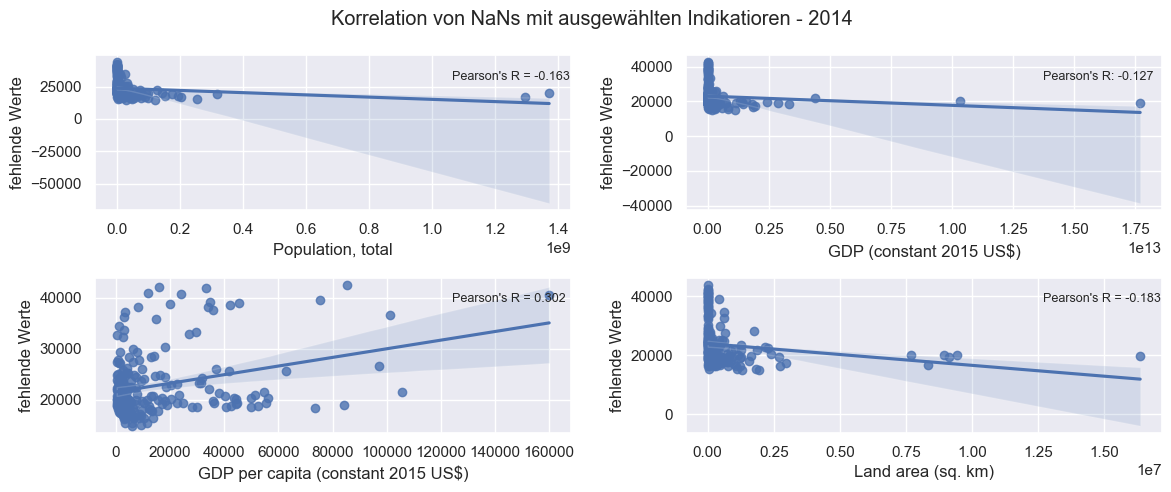

In [9]:
sns.set_theme(color_codes=True)
#sns.set_style('white')
#sns.set_context('paper', font_scale=2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 5), nrows=2, ncols=2)

x="Population, total"
sns.regplot(data=df, x=x, y='NaNs', ax=ax1)
ax1.set_xlabel(x)
ax1.set_ylabel('fehlende Werte')
#ax1.legend(markers, colors.keys(), numpoints=1)
ax1.text(0.75, 0.9,f"Pearson's R = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax1.transAxes, fontsize=9)

x="GDP (constant 2015 US$)"
sns.regplot(data=df, x=x, y='NaNs', ax=ax2)
ax2.set_xlabel(x)
ax2.set_ylabel('fehlende Werte')
#ax1.legend(markers, colors.keys(), numpoints=1)
ax2.text(0.75, 0.9,f"Pearson's R: {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax2.transAxes, fontsize=9)

x="GDP per capita (constant 2015 US$)"
sns.regplot(data=df, x=x, y='NaNs', ax=ax3)
ax3.set_xlabel(x)
ax3.set_ylabel('fehlende Werte')
#ax3.legend(markers, colors.keys(), numpoints=1)
ax3.text(0.75, 0.9, f"Pearson's R = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax3.transAxes, fontsize=9)

x="Land area (sq. km)"
sns.regplot(data=df, x=x, y='NaNs', ax=ax4)
ax4.set_xlabel(x)
ax4.set_ylabel('fehlende Werte')
#ax4.legend(markers, colors.keys(), numpoints=1)
ax4.text(0.75, 0.9, f"Pearson's R = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax4.transAxes, fontsize=9)


plt.suptitle('Korrelation von NaNs mit ausgewählten Indikatioren - 2014')
plt.tight_layout()
#plt.savefig('figures/correlation_nans')


In [10]:
results.sort_values('abs', ascending=False).head(15)

,NaNs,abs
Indicator Name,,
NaNs,1.0000,1.0000
Statistical performance indicators (SPI): Pillar 3 data products score (scale 0-100),-0.8680,0.8680
Statistical Capacity Score (Overall Average) (scale 0 - 100),-0.7460,0.7460
Periodicity and timeliness assessment of statistical capacity (scale 0 - 100),-0.7249,0.7249
Statistical performance indicators (SPI): Pillar 1 data use score (scale 0-100),-0.6467,0.6467
Methodology assessment of statistical capacity (scale 0 - 100),-0.5986,0.5986
Net ODA received per capita (current US$),0.5845,0.5845
Source data assessment of statistical capacity (scale 0 - 100),-0.5839,0.5839
Net ODA received (% of GNI),0.5736,0.5736


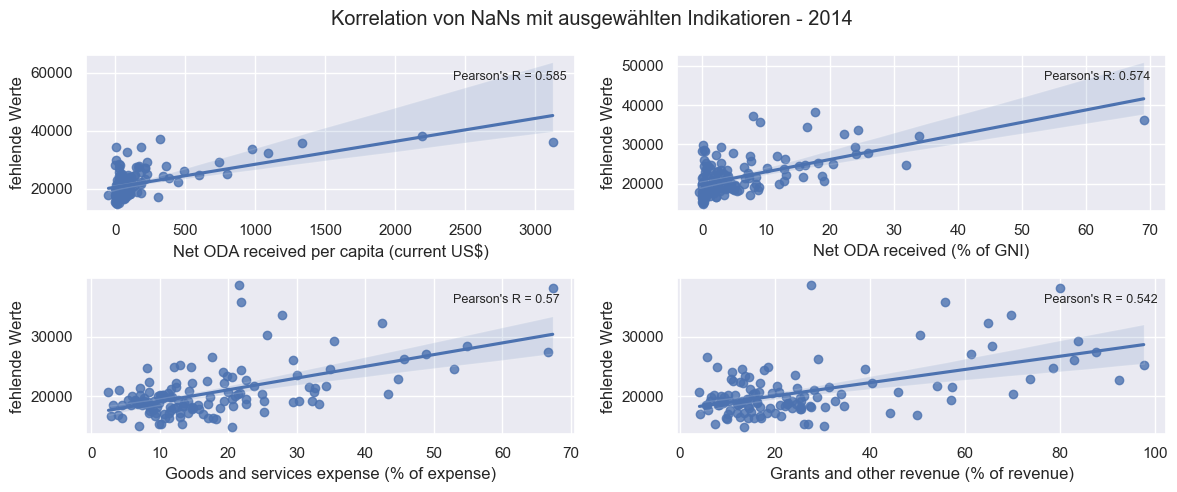

In [11]:
sns.set_theme(color_codes=True)
#sns.set_style('white')
#sns.set_context('paper', font_scale=2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 5), nrows=2, ncols=2)

x='Net ODA received per capita (current US$)'
sns.regplot(data=df, x=x, y='NaNs', ax=ax1)
ax1.set_xlabel(x)
ax1.set_ylabel('fehlende Werte')
#ax1.legend(markers, colors.keys(), numpoints=1)
ax1.text(0.75, 0.9,f"Pearson's R = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax1.transAxes, fontsize=9)

x='Net ODA received (% of GNI)'
sns.regplot(data=df, x=x, y='NaNs', ax=ax2)
ax2.set_xlabel(x)
ax2.set_ylabel('fehlende Werte')
#ax1.legend(markers, colors.keys(), numpoints=1)
ax2.text(0.75, 0.9,f"Pearson's R: {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax2.transAxes, fontsize=9)

x='Goods and services expense (% of expense)'
sns.regplot(data=df, x=x, y='NaNs', ax=ax3)
ax3.set_xlabel(x)
ax3.set_ylabel('fehlende Werte')
#ax3.legend(markers, colors.keys(), numpoints=1)
ax3.text(0.75, 0.9, f"Pearson's R = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax3.transAxes, fontsize=9)

x='Grants and other revenue (% of revenue)'
sns.regplot(data=df, x=x, y='NaNs', ax=ax4)
ax4.set_xlabel(x)
ax4.set_ylabel('fehlende Werte')
#ax4.legend(markers, colors.keys(), numpoints=1)
ax4.text(0.75, 0.9, f"Pearson's R = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax4.transAxes, fontsize=9)


plt.suptitle('Korrelation von NaNs mit ausgewählten Indikatioren - 2014')
plt.tight_layout()
plt.savefig('figures/correlation_nans')